# Vehicle Loan Prediction Machine Learning Model

# Chapter 6 - Model Evaluation

## Lesson 1 - Introduction 

- Before we get started let's load the libraries we want 
- Notice the addition of sklean.metrics and scikitplot.metrics
- If you see an error later in the chapter referring to plot_confusion_matrix then you may need to upgrade to the latest version of sklearn by running "pip install --upgrade scikit-learn" from the command line

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

As usual, we should load our data into a DataFrame

In [2]:
loan_df = pd.read_csv('../data/vehicle_loans_feat.csv', index_col='UNIQUEID')

### EXERCISE 

- Can you build the same simple logistic regression model we created in the previous chapter 
- HINT: Remember to convert your categorical data to the 'category' type
- HINT: Remember to train your model using [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)
- If you find it easier you can add additional code cells to breakdown the exercise into smaller chunks

### SOLUTION

In [3]:
#solution space 1
category_cols = ['MANUFACTURER_ID','STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

In [4]:
#solution space 2
small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']
loan_df_sml = loan_df[small_cols]

loan_data_dumm = pd.get_dummies(loan_df_sml, prefix_sep='_', drop_first=True)
x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
y = loan_data_dumm['LOAN_DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

Nice, now let's use [score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) to get the accuracy of the model

In [5]:
#get model accuracy
logistic_model.score(x_test, y_test)

0.7822907507881023

## Lesson 2 - Evaluation Metrics

### Confusion Matrix

- We can create a simple confusion matrix by combining the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) functions from sklearn

- First, we need use [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) to extract our model's predictions on the test data

In [6]:
#get model predictions
preds = logistic_model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- We have already seen that [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) returns an array of the predicted classes
- Now we can pass it into the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method alongside the real classes for our test data

In [7]:
#confusion matrix
conf_mat = confusion_matrix(y_test,preds)
conf_mat

array([[36476,     1],
       [10151,     3]], dtype=int64)

[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) returns a 2d array of TN, FP, FN and TP

2d array is an array with an array, we can access the elements using indexes much like a regular array 

In our case, we can think of the confusion_matrix as a table with rows and columns 

we access an element\[row_idx\]\[col_idx\]

Let's extract tn and fp from the confusion matrix

In [8]:
#extract values
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]


Great! Now let's print the outputs

In [9]:
#print values
print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  36476
False Positives (Incorrect Defaults):  1
False Negatives (Incorrect Non-Defaults):  10151
True Positives (Correct Defaults) 3


Ok, now the 78% accuracy makes a bit more sense, our model is pretty much predicting all loans as non-defaults

- Remember from previous lessons that about 78% of loans in our dataset were non-defaults. 
- This is a good example of where accuracy can be a misleading statistic. 
- Reporting that you predicted 78% correctly might appear impressive, but in reality, the task is to identify loans that will default, from this perspective the model has failed completely 

sklearn also provides a useful function for generating plots of confusion matrices [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

It takes 3 required parameters 
- the trained model
- the test features 
- the test labels

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


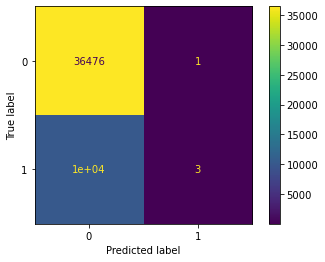

In [10]:
#plot confusion matrix
plot_confusion_matrix(logistic_model, x_test, y_test)

By now you will have gathered that accuracy alone is not a reliable indicator of model performance let's discuss some other measures of performance 

### Precision  = TP/TP + FP 

- Out of those we predicted as positive, how many actually were positive?
- Useful when the cost of false positives is high. i.e. in an email spam filter 

sklearn provides the [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) function which takes 2 parameters 
- the test labels 
- the predicted labels

In [11]:
#get precision
precision = precision_score(y_test, preds)
precision

0.75

Ok, out of the positive predictions, 75% were actually positive. Although, we can see from the confusion matrix that the model  only predicted a small number of instances as positive.

### Recall = TP/TP + FN

- How many of the actual positive cases did we correctly identify?
- Useful when the cost of false negatives is high. i.e. in disease detection

sklearn provides the [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) function which takes 2 parameters 
- the test labels 
- the predicted labels


In [12]:
#get recall
recall = recall_score(y_test, preds)
recall

0.00029545006893834944

Recall of ~0.0003, we hardly identified any of the loan defaults, hopefully, now you are starting to understand why this model is not reliable

### F1 Score = 2((precision * recall)/(precision + recall))

- Useful when we need a balance between precision and recall
- Less affected by large numbers of true negatives than accuracy 

sklearn provides the [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) function which takes 2 parameters 
- the test labels 
- the predicted labels

In [13]:
#get f1 score
f1 = f1_score(y_test, preds)
f1

0.0005906674542232723

f1 score of ~0.0006 should prove beyond doubt that our model is not reliable despite the 78% accuracy

## Lesson 3 - Roc Curve

We can dig deeper into the performance of a model by plotting the ROC curve and calculating the AUC

- To plot the ROC curve we first need to extract the predicted probabilities from our model against the test set
- This can be done by passing the test features to sklearns [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)



In [14]:
#get predicted probabilities
probs = logistic_model.predict_proba(x_test)
probs

array([[0.71535605, 0.28464395],
       [0.82077212, 0.17922788],
       [0.79469033, 0.20530967],
       ...,
       [0.77460177, 0.22539823],
       [0.90237534, 0.09762466],
       [0.74213712, 0.25786288]])

The output of [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) is a multi-dimensional array
- The number of columns is the number of values in the target variable 
- The number of rows is the number of samples in the test data 

Like a dataframe, we can use the shape property of a multi-dimensional array

In [15]:
#probs shape
probs.shape

(46631, 2)

Great! We have 46631 rows and 2 columns 
- Cells in the first column give the predicted probability that a data point belongs to class 0
- Cells in the second column give the predicted probability that a data point belongs to class 1

Let's look at the values in these columns 

In [16]:
#get columns
print(probs[:,0])
print(probs[:,1])

[0.71535605 0.82077212 0.79469033 ... 0.77460177 0.90237534 0.74213712]
[0.28464395 0.17922788 0.20530967 ... 0.22539823 0.09762466 0.25786288]


We can also create a dataframe and get the summary statistics for our predicted probabilities 

In [17]:
#create dataframe
probs_df = pd.DataFrame()
probs_df['prob_0'] = probs[:,0]
probs_df['prob_1'] = probs[:,1]
probs_df.describe()

,prob_0,prob_1
count,46631.000000,46631.000000
mean,0.783703,0.216297
std,0.067731,0.067731
min,0.480137,0.035141
25%,0.740040,0.169147
50%,0.787257,0.212743
75%,0.830853,0.259960
max,0.964859,0.519863


### Plotting the ROC Curve 

- sklearn does not provide an out of the box function for plotting the ROC curve (see scikitplot)
- but it does provide the [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) function which gets us some of the way 

We pass [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) three parameters
- the real labels for the test yet 
- the predicted probability of class 1 for the test set 
- pos_label, the class label of the positive class (1 in our case)


In [18]:
#roc
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

The [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) function returns 3 values

- threshold
- fpr (False Positive Rate)
- tpr (True Positive Rate)

Let's take a look at them

In [19]:
#roc results
print("FPR: ", fpr)
print("TPR ", tpr)
print("Threshold: ", threshold)

FPR:  [0.00000000e+00 2.74145352e-05 2.74145352e-05 ... 9.99725855e-01
 9.99725855e-01 1.00000000e+00]
TPR  [0.00000000e+00 9.84833563e-05 2.95450069e-04 ... 9.99901517e-01
 1.00000000e+00 1.00000000e+00]
Threshold:  [1.51986308 0.51986308 0.50719613 ... 0.04980861 0.04974156 0.03514125]


Ok each of these variables is an array of floating-point values, let's put them into a dataframe to try and make sense of them

In [20]:
#roc dataframe
roc_df = pd.DataFrame()
roc_df['fpr'] = fpr
roc_df['tpr'] = tpr
roc_df['threshold'] = threshold

roc_df.describe()


,fpr,tpr,threshold
count,16526.000000,16526.000000,16526.000000
mean,0.412808,0.524306,0.230929
std,0.274268,0.286163,0.066969
min,0.000000,0.000000,0.035141
25%,0.177646,0.278782,0.186249
50%,0.380281,0.534765,0.227759
75%,0.626217,0.771716,0.271168
max,1.000000,1.000000,1.519863


- Each variable has 16454 values
- The values of fpr and tpr range from 0 to 1

Essentially, the roc_curve function is evaluating the tpr and fpr for our model using different classification thresholds 

- Each value in threshold represents a different classification threshold

We can use these values to calculate AUC for our model 

The sklearn [auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) function takes two parameters

- the fpr from [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- the tpr from [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [21]:
#auc
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

AUC:  0.6095906060620443


Our model has an AUC of ~0.61

- The AUC score for a random classifier is 0.5!
- Our model is not doing a good job of separating the classes 

To make life easier we have provided the plot_roc_curve function 

- Check out the supplementary material for an explanation of this function

In [22]:
#plot function
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

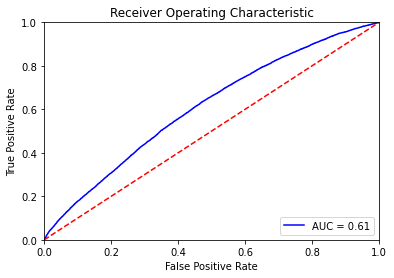

In [23]:
#create plot
plot_roc_curve(fpr, tpr, roc_auc)

## Lesson 4 - Advanced Evaluation

In this lesson, we will dig deeper into our model performance by looking at class percentage splits and probability distributions 

To make life easier we will create a new DataFrame called results_df with three columns 
- true_class: the true class labels for our test set 
- predicted_class: the predicted class labels for our test set 
- default_prob: the predicted probability of default for the test set

In [24]:
#results dataframe
results_df = pd.DataFrame()
results_df['true_class'] = y_test
results_df['predicted_class'] = list(preds)
results_df['default_prob'] = probs[:, 1]

### Class Prediction Percentages 

We can get more insight into model performance by looking at the class prediction percentages 

In other words 
- What percentage of our 1s were predicted as 1s (TPR)
- What percentage of our 1s were predicted as 0s (FNR)
- What percentage of our 0s were predicted as 0s (TNR)
- What percentage of our 0s were predicted as 1s (FPR)


### EXERCISE 

- Using [df.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) can you print the above-mentioned metrics
- Feel free to look back at examples of groupby and value_counts from earlier in the course

### SOLUTION

In [25]:
#type solution here
results_df.groupby('true_class')['predicted_class'].value_counts(normalize = True)

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64

As we expected, nearly all of our test cases were classified as 0s (non defaulted loans)

### Class Probability Distributions 

- We can use results_df to plot the class probability distributions 

Pandas allows us to filter rows using boolean operations

For example, the code below can be used to get the predicted default probability of all the non-defaulted loans 

In [27]:
#defaut probs
default_probs_f = results_df[results_df['true_class'] == 0]['default_prob']

### EXERCISE 

- Use pandas filtering to create a variable default_probs_t which contains the predicted default probability for all true defaulted loans 

### SOLUTION

In [30]:
#type solution here
default_probs_t = results_df[results_df['true_class'] == 1]['default_prob']

We can use seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to plot the distributions of our new variables on one chart

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


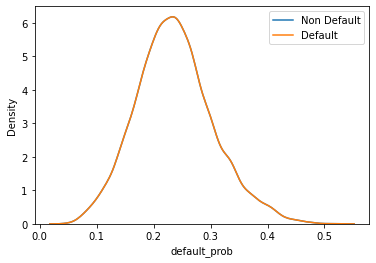

In [31]:
#plot distributions
sns.distplot(default_probs_f, label = 'Non Default', hist = False)
sns.distplot(default_probs_t, label = 'Default', hist = False)
plt.legend(loc = 'best')
plt.show()

This chart again shows us that the model has very poor separability

However, we can see that the probability of a defaulted loan being predicted as a default is generally higher than the same probability for a non-default so maybe there is something we can work with

### EXERCISE 

We have discussed some fundamental techniques for evaluating your model, as with everything, in the real world building predictive models requires several iterations 
therefore it is a good idea to wrap up your evaluation code into a reusable function. 

Based on what we have discussed please fill in the function declaration below to create a reusable evaluation function

### SOLUTION

In [32]:
def eval_model(model, x_test, y_test):
    #type solution here
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


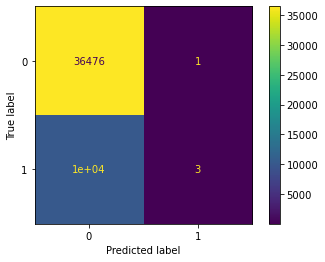



Accuracy:  0.7822907507881023
Precision:  0.75
Recall:  0.00029545006893834944
F1:  0.0005906674542232723
AUC:  0.6095906060620443


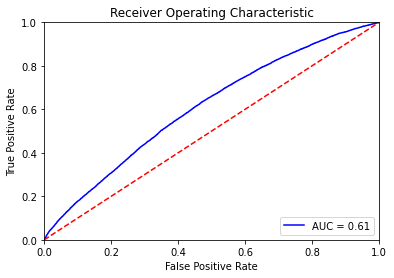

C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\richard.rodrot\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


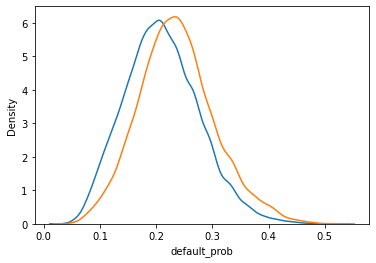

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64


In [33]:
#use eval model
eval_model(logistic_model, x_test, y_test)